In [2]:
%%time
from __future__ import absolute_import, print_function, division, unicode_literals 
%reload_ext autoreload
%autoreload 2
%reload_ext tensorboard

import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize":(12,10)})
sns.set_style("whitegrid")
%matplotlib inline

import os
import gc
gc.enable()
import sys
import time
import json
import csv
import random
import datetime

try:
  %tensorflow_version 2.x
  print("TensorFlow 2.0 rc is up and running.")
except:
  print("There is some problem in initializing TensorFlow 2.0 rc")

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import *
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

print("TensorFlow version: ",tf.__version__)
print("Eagerly Executing: ",tf.executing_eagerly())
print("GPU is", "available." if tf.test.is_gpu_available() else "unavailable.")
print("Seeding..")

def seedall(seed):
  try:
    np.random.seed(seed)
    random.seed(seed)
    tf.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = seed
    print("Random Seeds have been initialized")
  except:
    print("Couldn't initialize the random seed.")

seedall(999)

print("Supressing warnings..")
import warnings
warnings.filterwarnings("ignore")
print("Done")

TensorFlow is already loaded. Please restart the runtime to change versions.
TensorFlow 2.0 rc is up and running.
TensorFlow version:  1.14.0
Eagerly Executing:  False
GPU is available.
Seeding..
Couldn't initialize the random seed.
Supressing warnings..
Done
CPU times: user 65.8 ms, sys: 110 ms, total: 176 ms
Wall time: 1.32 s


In [0]:
NUM_WORDS = 10000
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
  results = np.zeros((len(sequences),dimension))
  for i, word_indices in enumerate(sequences):
    results[i, word_indices] = 1.0
  return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

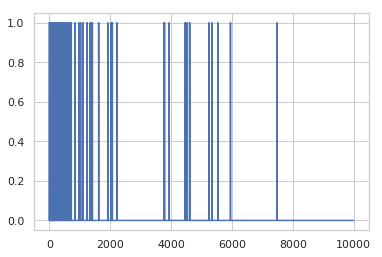

In [10]:
plt.plot(train_data[0])

### Creating a baseline model

In [36]:
baseline_model = keras.Sequential([
    layers.Dense(16, activation=tf.nn.relu,kernel_initializer="he_uniform", input_shape=(NUM_WORDS,)),
    layers.Dense(16, activation=tf.nn.relu, kernel_initializer="he_uniform"),
    layers.Dense(1, activation=tf.nn.sigmoid )
])

baseline_model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy",'binary_crossentropy'])

baseline_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_31 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [37]:
baseline_history = baseline_model.fit(train_data, 
                                      train_labels, 
                                      epochs=20, 
                                      batch_size=512, 
                                      validation_data=(test_data,test_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 153us/sample - loss: 0.4795 - acc: 0.8061 - binary_crossentropy: 0.4795 - val_loss: 0.3402 - val_acc: 0.8761 - val_binary_crossentropy: 0.3402
Epoch 2/20
25000/25000 [==============================] - 4s 143us/sample - loss: 0.2550 - acc: 0.9099 - binary_crossentropy: 0.2550 - val_loss: 0.2848 - val_acc: 0.8879 - val_binary_crossentropy: 0.2848
Epoch 3/20
25000/25000 [==============================] - 4s 144us/sample - loss: 0.1884 - acc: 0.9330 - binary_crossentropy: 0.1884 - val_loss: 0.2876 - val_acc: 0.8843 - val_binary_crossentropy: 0.2876
Epoch 4/20
25000/25000 [==============================] - 4s 146us/sample - loss: 0.1521 - acc: 0.9475 - binary_crossentropy: 0.1521 - val_loss: 0.3064 - val_acc: 0.8802 - val_binary_crossentropy: 0.3064
Epoch 5/20
25000/25000 [==============================] - 4s 148us/sample - loss: 0.1254 - acc: 0.9602 - binary_crossentropy: 0.1254 -

In [25]:
result = baseline_model.evaluate(test_data, test_labels)
for name, value in zip(baseline_model.metrics_names,result):
  print('%s:%.3f'%(name, value))

25000/25000 [==============================] - 3s 105us/sample - loss: 0.9466 - acc: 0.8533
loss:0.947
acc:0.853


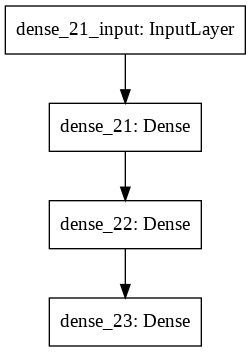

In [26]:
plot_model(baseline_model)

### Samller Model

In [27]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 4)                 40004     
_________________________________________________________________
dense_25 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [28]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.6246 - acc: 0.6429 - binary_crossentropy: 0.6246 - val_loss: 0.5715 - val_acc: 0.7056 - val_binary_crossentropy: 0.5715
Epoch 2/20
25000/25000 - 4s - loss: 0.5234 - acc: 0.8052 - binary_crossentropy: 0.5234 - val_loss: 0.5164 - val_acc: 0.7886 - val_binary_crossentropy: 0.5164
Epoch 3/20
25000/25000 - 4s - loss: 0.4713 - acc: 0.8631 - binary_crossentropy: 0.4713 - val_loss: 0.4859 - val_acc: 0.8209 - val_binary_crossentropy: 0.4859
Epoch 4/20
25000/25000 - 4s - loss: 0.4356 - acc: 0.8936 - binary_crossentropy: 0.4356 - val_loss: 0.4637 - val_acc: 0.8458 - val_binary_crossentropy: 0.4637
Epoch 5/20
25000/25000 - 4s - loss: 0.4073 - acc: 0.9120 - binary_crossentropy: 0.4073 - val_loss: 0.4503 - val_acc: 0.8513 - val_binary_crossentropy: 0.4503
Epoch 6/20
25000/25000 - 4s - loss: 0.3836 - acc: 0.9252 - binary_crossentropy: 0.3836 - val_loss: 0.4355 - val_acc: 0.8678 - val_binary_crossentropy: 0.4355
Ep

### Bigger Model

In [29]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_28 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [30]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.3438 - acc: 0.8541 - binary_crossentropy: 0.3438 - val_loss: 0.2946 - val_acc: 0.8802 - val_binary_crossentropy: 0.2946
Epoch 2/20
25000/25000 - 4s - loss: 0.1505 - acc: 0.9455 - binary_crossentropy: 0.1505 - val_loss: 0.3333 - val_acc: 0.8714 - val_binary_crossentropy: 0.3333
Epoch 3/20
25000/25000 - 4s - loss: 0.0522 - acc: 0.9848 - binary_crossentropy: 0.0522 - val_loss: 0.4431 - val_acc: 0.8677 - val_binary_crossentropy: 0.4431
Epoch 4/20
25000/25000 - 4s - loss: 0.0081 - acc: 0.9989 - binary_crossentropy: 0.0081 - val_loss: 0.5586 - val_acc: 0.8685 - val_binary_crossentropy: 0.5586
Epoch 5/20
25000/25000 - 4s - loss: 0.0010 - acc: 1.0000 - binary_crossentropy: 0.0010 - val_loss: 0.6534 - val_acc: 0.8704 - val_binary_crossentropy: 0.6534
Epoch 6/20
25000/25000 - 4s - loss: 3.1525e-04 - acc: 1.0000 - binary_crossentropy: 3.1525e-04 - val_loss: 0.6967 - val_acc: 0.8706 - val_binary_crossentropy: 0

### Plot training and validation loss

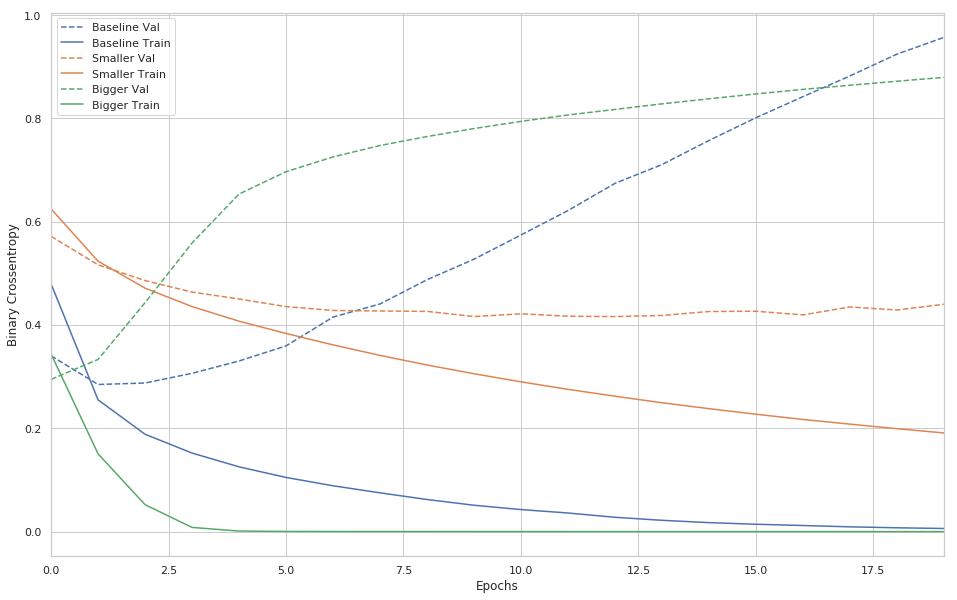

In [39]:
def plot_history(histories, key="binary_crossentropy"):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])

plot_history([
              ('baseline',baseline_history),
              ('smaller',smaller_history),
              ('bigger',bigger_history)
])

### Strategies to Prevent Overfitting

In [0]:
# 1. Weight Regularization

In [43]:
l2_model = keras.Sequential([
                             layers.Dense(16, kernel_initializer="glorot_uniform",kernel_regularizer=keras.regularizers.l2(0.001),activation="relu",input_shape=(NUM_WORDS,)),
                             layers.Dense(16, kernel_initializer="glorot_uniform",kernel_regularizer=keras.regularizers.l2(0.001),activation="relu"),
                             layers.Dense(1,activation="sigmoid")
])

l2_model.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy","binary_crossentropy"])

l2_model_history = l2_model.fit(train_data, 
                                train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.5667 - acc: 0.7438 - binary_crossentropy: 0.5276 - val_loss: 0.4106 - val_acc: 0.8755 - val_binary_crossentropy: 0.3705
Epoch 2/20
25000/25000 - 4s - loss: 0.3206 - acc: 0.9070 - binary_crossentropy: 0.2758 - val_loss: 0.3459 - val_acc: 0.8843 - val_binary_crossentropy: 0.2975
Epoch 3/20
25000/25000 - 3s - loss: 0.2589 - acc: 0.9308 - binary_crossentropy: 0.2074 - val_loss: 0.3403 - val_acc: 0.8864 - val_binary_crossentropy: 0.2866
Epoch 4/20
25000/25000 - 3s - loss: 0.2327 - acc: 0.9401 - binary_crossentropy: 0.1769 - val_loss: 0.3515 - val_acc: 0.8821 - val_binary_crossentropy: 0.2944
Epoch 5/20
25000/25000 - 3s - loss: 0.2141 - acc: 0.9496 - binary_crossentropy: 0.1555 - val_loss: 0.3665 - val_acc: 0.8789 - val_binary_crossentropy: 0.3069
Epoch 6/20
25000/25000 - 3s - loss: 0.2018 - acc: 0.9546 - binary_crossentropy: 0.1411 - val_loss: 0.3787 - val_acc: 0.8762 - val_binary_crossentropy: 0.3172
Ep

In [0]:
#2 Dropout

In [47]:
dropout_model = keras.Sequential([
                             layers.Dense(16, kernel_initializer="glorot_uniform",activation="relu",input_shape=(NUM_WORDS,)),
                             layers.Dropout(0.5),
                             layers.Dense(16, kernel_initializer="glorot_uniform",activation="relu"),
                             layers.Dropout(0.5),
                             layers.Dense(1,activation="sigmoid")
])

dropout_model.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy","binary_crossentropy"])

dropout_model_history = dropout_model.fit(train_data, 
                                train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.6235 - acc: 0.6458 - binary_crossentropy: 0.6235 - val_loss: 0.4933 - val_acc: 0.8521 - val_binary_crossentropy: 0.4933
Epoch 2/20
25000/25000 - 3s - loss: 0.4533 - acc: 0.8076 - binary_crossentropy: 0.4533 - val_loss: 0.3391 - val_acc: 0.8823 - val_binary_crossentropy: 0.3391
Epoch 3/20
25000/25000 - 3s - loss: 0.3517 - acc: 0.8642 - binary_crossentropy: 0.3517 - val_loss: 0.2883 - val_acc: 0.8866 - val_binary_crossentropy: 0.2883
Epoch 4/20
25000/25000 - 3s - loss: 0.2952 - acc: 0.8961 - binary_crossentropy: 0.2952 - val_loss: 0.2739 - val_acc: 0.8896 - val_binary_crossentropy: 0.2739
Epoch 5/20
25000/25000 - 3s - loss: 0.2576 - acc: 0.9137 - binary_crossentropy: 0.2576 - val_loss: 0.2764 - val_acc: 0.8890 - val_binary_crossentropy: 0.2764
Epoch 6/20
25000/25000 - 3s - loss: 0.2267 - acc: 0.9245 - binary_crossentropy: 0.2267 - val_loss: 0.2820 - val_acc: 0.8860 - val_binary_crossentropy: 0.2820
Ep

In [49]:
#3. BatchNormalization
normalize_model = keras.Sequential([
                             layers.Dense(16, kernel_initializer="glorot_uniform",activation="relu",input_shape=(NUM_WORDS,)),
                             layers.BatchNormalization(),
                             layers.Dense(16, kernel_initializer="glorot_uniform",activation="relu"),
                             layers.BatchNormalization(),
                             layers.Dense(1,activation="sigmoid")
])

normalize_model.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy","binary_crossentropy"])

normalize_model_history = normalize_model.fit(train_data, 
                                train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.4293 - acc: 0.8048 - binary_crossentropy: 0.4293 - val_loss: 0.5241 - val_acc: 0.8646 - val_binary_crossentropy: 0.5241
Epoch 2/20
25000/25000 - 3s - loss: 0.2070 - acc: 0.9263 - binary_crossentropy: 0.2070 - val_loss: 0.4153 - val_acc: 0.8771 - val_binary_crossentropy: 0.4153
Epoch 3/20
25000/25000 - 3s - loss: 0.1303 - acc: 0.9611 - binary_crossentropy: 0.1303 - val_loss: 0.3590 - val_acc: 0.8669 - val_binary_crossentropy: 0.3590
Epoch 4/20
25000/25000 - 3s - loss: 0.0810 - acc: 0.9798 - binary_crossentropy: 0.0810 - val_loss: 0.3287 - val_acc: 0.8652 - val_binary_crossentropy: 0.3287
Epoch 5/20
25000/25000 - 3s - loss: 0.0469 - acc: 0.9913 - binary_crossentropy: 0.0469 - val_loss: 0.3244 - val_acc: 0.8634 - val_binary_crossentropy: 0.3244
Epoch 6/20
25000/25000 - 4s - loss: 0.0272 - acc: 0.9962 - binary_crossentropy: 0.0272 - val_loss: 0.3402 - val_acc: 0.8614 - val_binary_crossentropy: 0.3402
Ep

In [0]:
### All regularizers

In [51]:
regularized_model = keras.Sequential([
                             layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001) , kernel_initializer="glorot_uniform",activation="relu",input_shape=(NUM_WORDS,)),
                             layers.Dropout(0.5),
                             layers.BatchNormalization(),
                             layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), kernel_initializer="glorot_uniform",activation="relu"),
                             layers.Dropout(0.5),
                             layers.BatchNormalization(),
                             layers.Dense(1,activation="sigmoid")
])

regularized_model.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy","binary_crossentropy"])

regularized_model_history = regularized_model.fit(train_data, 
                                train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.7197 - acc: 0.6500 - binary_crossentropy: 0.6764 - val_loss: 0.6476 - val_acc: 0.8280 - val_binary_crossentropy: 0.6027
Epoch 2/20
25000/25000 - 3s - loss: 0.5285 - acc: 0.7823 - binary_crossentropy: 0.4828 - val_loss: 0.5571 - val_acc: 0.8606 - val_binary_crossentropy: 0.5111
Epoch 3/20
25000/25000 - 3s - loss: 0.4453 - acc: 0.8324 - binary_crossentropy: 0.3991 - val_loss: 0.4653 - val_acc: 0.8568 - val_binary_crossentropy: 0.4190
Epoch 4/20
25000/25000 - 3s - loss: 0.3877 - acc: 0.8644 - binary_crossentropy: 0.3414 - val_loss: 0.4040 - val_acc: 0.8709 - val_binary_crossentropy: 0.3577
Epoch 5/20
25000/25000 - 3s - loss: 0.3464 - acc: 0.8827 - binary_crossentropy: 0.2999 - val_loss: 0.3742 - val_acc: 0.8710 - val_binary_crossentropy: 0.3277
Epoch 6/20
25000/25000 - 3s - loss: 0.3082 - acc: 0.8974 - binary_crossentropy: 0.2616 - val_loss: 0.3410 - val_acc: 0.8824 - val_binary_crossentropy: 0.2943
Ep

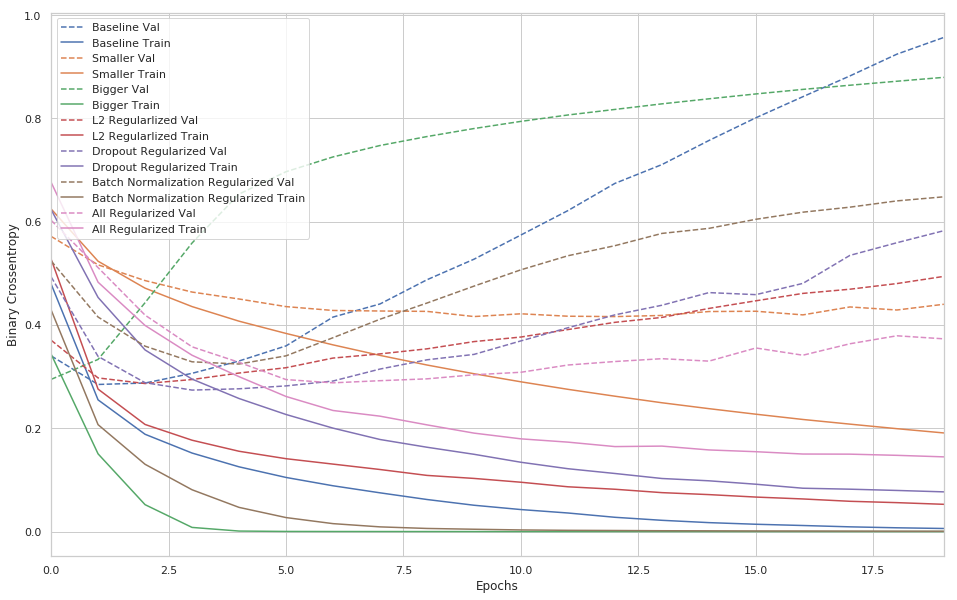

In [52]:
plot_history([
              ('baseline',baseline_history),
              ('smaller',smaller_history),
              ('bigger',bigger_history),
              ("l2 regularlized", l2_model_history),
              ("dropout regularized", dropout_model_history),
              ("batch normalization regularized", normalize_model_history),
              ("all regularized",regularized_model_history)
])